In [2]:
import collections
from collections import defaultdict
import sys
import json
import random
from jsmin import jsmin
from io import StringIO
import numpy as np
import copy
import importlib
from functools import partial
import math
import os
import compress_pickle
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

script_n = 'mf_bouton_convergence_210519'

sys.path.insert(0, '/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc')
import my_plot
importlib.reload(my_plot)
from my_plot import MyPlotData

import tools_mf_graph
importlib.reload(tools_mf_graph)

fname = ('/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc/' \
         'gen_db/mf_grc/input_graph_210520_all_100_2.gz')
input_graph = compress_pickle.load(fname)

# z_min = 19800-10000
# z_max = 29800+10000
# z_min = 19800
# z_max = 29800
z_min = 19800-5000
z_max = 29800+5000
# GrCs are fully reconstructed and proofread from 90k to 150k
x_min = 320*1000
x_max = 560*1000

mf_locs_within_box = set()
loc_size = defaultdict(int)

for mf_id, mf in input_graph.mfs.items():
    rosette_loc_size = {}
    mf.get_all_mf_locs_size(rosette_loc_size)
    for rosette_loc, size in rosette_loc_size.items():
        x, y, z = rosette_loc
        if x < x_min or x > x_max:
            continue
        if z < z_min or z > z_max:
            continue
        mf_locs_within_box.add(rosette_loc)


def get_convergence_pairs(graph):
    convergence_pairs = defaultdict(int)
    for grc_id in graph.grcs:
        grc = graph.grcs[grc_id]
        connected_locs = []
        for edge in grc.edges:
            mf_id, mf_loc = edge
            if mf_loc not in mf_locs_within_box:
                continue
            connected_locs.append(mf_loc)
            loc_size[mf_loc] += 1
        for pair in itertools.combinations(connected_locs, 2):
            convergence_pairs[tuple(sorted(pair))] += 1
    return convergence_pairs

data = get_convergence_pairs(input_graph)
mf_locs_list = list(mf_locs_within_box)
mf_locs_list = sorted(mf_locs_list, key=lambda x: x[0])

conv_mat = []
for i in mf_locs_list:
    row = []
    for j in mf_locs_list:
        row.append(data[tuple(sorted((i, j)))])
    conv_mat.append(row)


In [2]:
print(len(mf_locs_list))

234


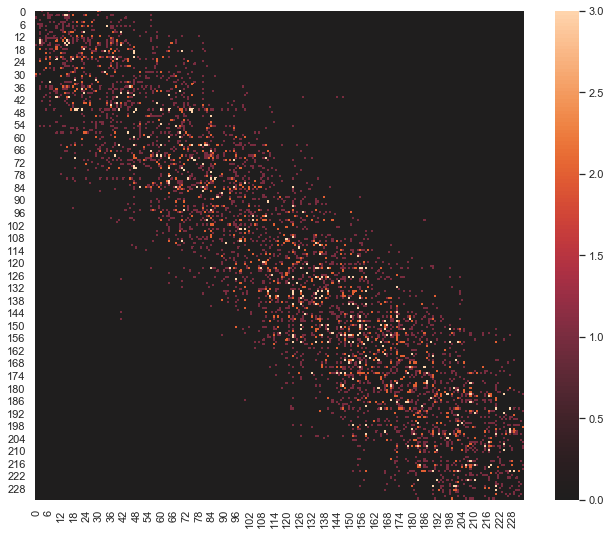

In [3]:
sns.set_theme(style="white")
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(conv_mat,
            center=0,
            vmax=3,
            square=True,
           )

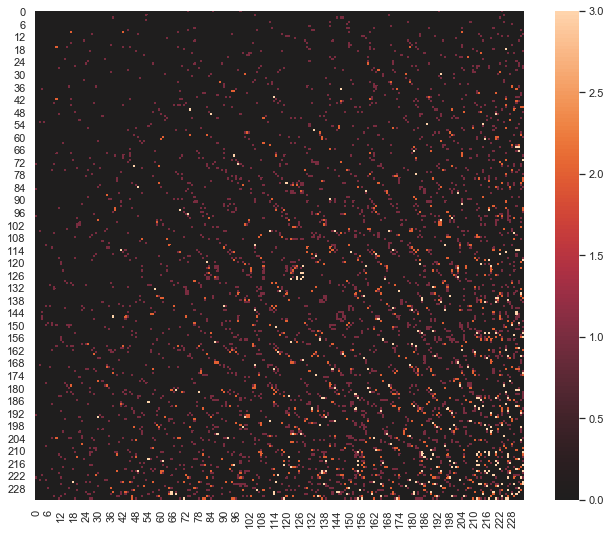

In [4]:
# plot by loc size
mf_locs_list_by_size = sorted(mf_locs_list, key=lambda x: loc_size[x])
conv_mat_by_size = []
for i in mf_locs_list_by_size:
    row = []
    for j in mf_locs_list_by_size:
        row.append(data[tuple(sorted((i, j)))])
    conv_mat_by_size.append(row)
# plot
sns.set_theme(style="white")
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(conv_mat_by_size,
            center=0,
            vmax=3,
            square=True,
           )

In [3]:
# random_datas = compress_pickle.load('mf_bouton_convergence_210519_random_gen_circle_22000_14800_34800_100.gz')
random_datas = compress_pickle.load('mf_bouton_convergence_210519_random_gen_dist_14800_34800_100.gz')
# calculate means and std
random_data_list = defaultdict(list)
for rand_data in random_datas:
    for pair in itertools.combinations(mf_locs_list, 2):
        pair = tuple(sorted(pair))
        random_data_list[pair].append(rand_data[pair])

import statistics
random_means_mat = []
random_std_mat = []
z_mat = []
for i in mf_locs_list:
    mean_row = []
    std_row = []
    row = []
    for j in mf_locs_list:
        if i == j:
            mean_row.append(0)
            std_row.append(0)
            row.append(0)
            continue
        l = random_data_list[tuple(sorted((i, j)))]
        d = data[tuple(sorted((i, j)))]
        mean, std = statistics.mean(l), statistics.stdev(l)
        mean_row.append(mean)
        std_row.append(std)
        if mean == 0 and d == 0:
            row.append(0)
            continue
        elif mean == 0 and std == 0:
            std = 0.01
            val = min((d-mean)/std, 3)
            row.append(val)
            continue
        row.append((d-mean)/std)
    random_means_mat.append(mean_row)
    random_std_mat.append(std_row)
    z_mat.append(row)

In [6]:
# random_datas = compress_pickle.load('mf_bouton_convergence_210519_random_gen_circle_22000_14800_34800_100.gz')
random_datas = compress_pickle.load('mf_bouton_convergence_210519_random_gen_dist_14800_34800_100.gz')
# calculate means and std
random_data_list = defaultdict(list)
for rand_data in random_datas:
    for pair in itertools.combinations(mf_locs_list, 2):
        pair = tuple(sorted(pair))
        random_data_list[pair].append(rand_data[pair])

# random_means_mat = []
# random_std_mat = []
import statistics
z_mat = []
for i in mf_locs_list:
    row = []
    for j in mf_locs_list:
        if i == j:
            row.append(0)
            continue
        l = random_data_list[tuple(sorted((i, j)))]
        d = data[tuple(sorted((i, j)))]
        mean, std = statistics.mean(l), statistics.stdev(l)
        if mean == 0 and d == 0:
            row.append(0)
            continue
        elif mean == 0 and std == 0:
            std = 0.01
            val = min((d-mean)/std, 100)
            row.append(val)
            continue
        row.append((d-mean)/std)
    z_mat.append(row)

Widget Javascript not detected.  It may not be installed or enabled properly.


[(0.2519971417644415, 0.4987337088076726, 0.5751602783606602),
 (0.43156001218774975, 0.6160490836499025, 0.6735874169971766),
 (0.611122882611058, 0.7333644584921324, 0.7720145556336929),
 (0.7906857530343663, 0.8506798333343624, 0.8704416942702093),
 (0.95, 0.95, 0.95),
 (0.9282549678814984, 0.7863704363662967, 0.7963965173228867),
 (0.9022582584936525, 0.6005186021022944, 0.622400049291663),
 (0.8762615491058064, 0.4146667678382919, 0.44840358126043944),
 (0.8510408608937171, 0.23436274952246883, 0.2796010376480583)]

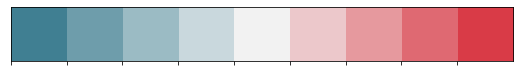

In [4]:
sns.choose_diverging_palette(as_cmap=False)

<AxesSubplot:>

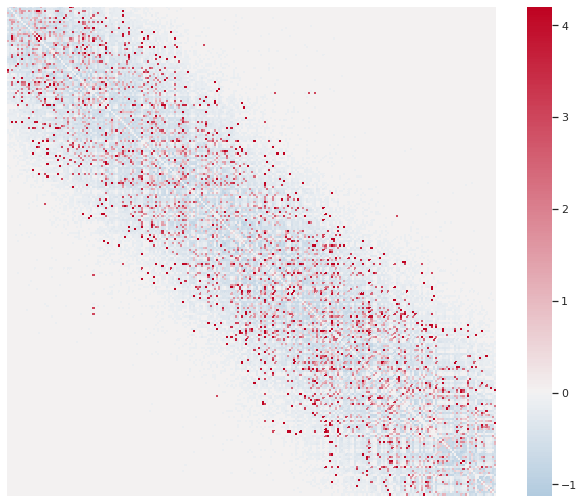

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white")
f, ax = plt.subplots(figsize=(11, 9))
# f, ax = plt.subplots(figsize=(5, 4))
# cmap = sns.diverging_palette(250, 10, as_cmap=True, l=50, sep=1)
cmap = sns.diverging_palette(250, 10, as_cmap=True, l=40, s=99, sep=1)
sns.heatmap(z_mat,
            center=0,
            vmax=4.2,
            square=True,
            xticklabels=[], yticklabels=[],
            cmap=cmap,
           )
# plt.tight_layout()
# f.savefig(f'{script_n}_zscore.png', bbox_inches='tight', transparent=True)

<AxesSubplot:>

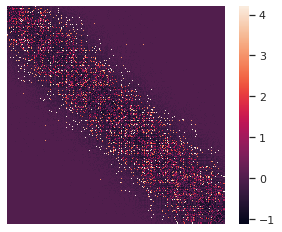

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white")
# f, ax = plt.subplots(figsize=(11, 9))
f, ax = plt.subplots(figsize=(5, 4))
# cmap = sns.diverging_palette(250, 10, as_cmap=True, l=50, sep=1)
# cmap = sns.diverging_palette(250, 10, as_cmap=True, l=40, s=99, sep=1)
sns.heatmap(z_mat,
#             center=1,
            vmax=4.2,
            square=True,
            xticklabels=[], yticklabels=[],
#             cmap=cmap,
           )
# f.savefig(f'{script_n}_zscore_small.png', bbox_inches='tight', transparent=True)

<AxesSubplot:>

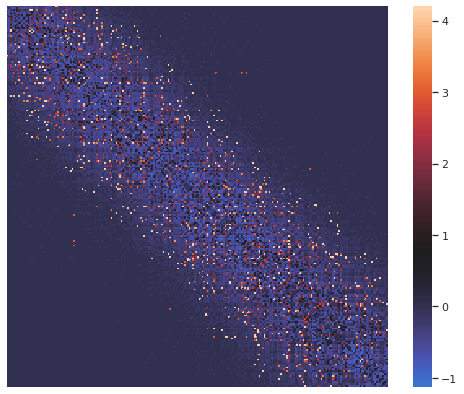

In [76]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white")
# f, ax = plt.subplots(figsize=(11, 9))
f, ax = plt.subplots(figsize=(9, 7))
# cmap = sns.diverging_palette(250, 10, as_cmap=True, l=50, sep=1)
# cmap = sns.diverging_palette(250, 10, as_cmap=True, l=40, s=99, sep=1)
sns.heatmap(z_mat,
            center=.75,
            vmax=4.2,
            square=True,
            xticklabels=[], yticklabels=[],
#             cmap=cmap,
           )
# f.savefig(f'{script_n}_zscore_med.png', bbox_inches='tight', transparent=True)

<AxesSubplot:>

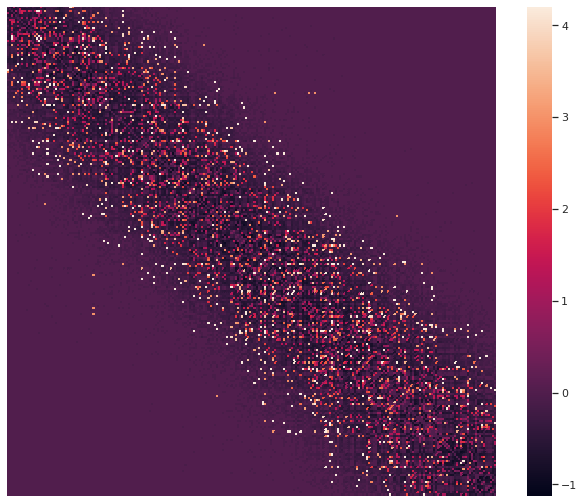

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white")
f, ax = plt.subplots(figsize=(11, 9))
# f, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(z_mat,
            center=0.5,
            vmax=4.2,
            square=True,
            xticklabels=[], yticklabels=[],
#             cmap=cmap,
           )
# f.savefig(f'{script_n}_zscore.png', bbox_inches='tight', transparent=True)

<AxesSubplot:>

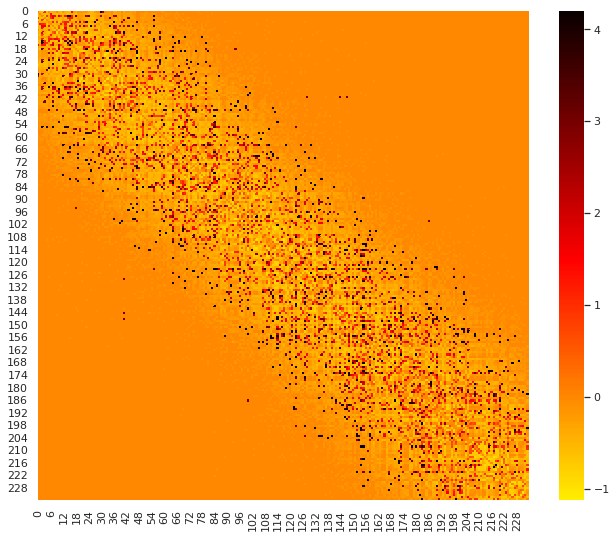

In [65]:
cmap='hot_r'
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(z_mat,
            vmax=4.2,
            cmap=cmap,
#             vmin=0,
            center=0.5,
           )

<AxesSubplot:>

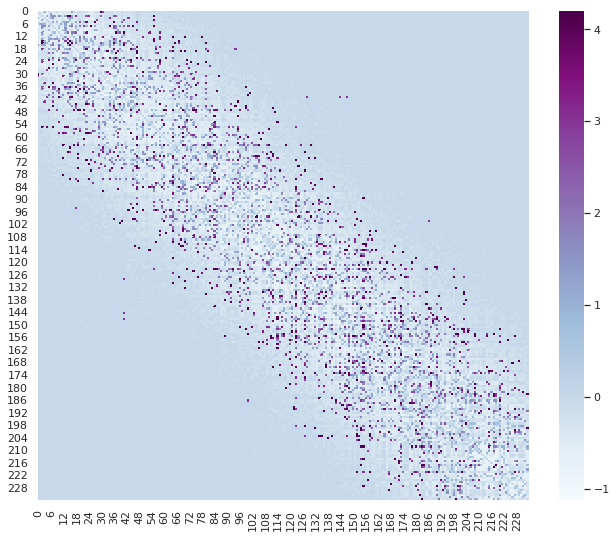

In [63]:
cmap='BuPu'
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(z_mat,
            vmax=4.2,
            cmap=cmap,
#             vmin=0,
            center=1.5,
           )

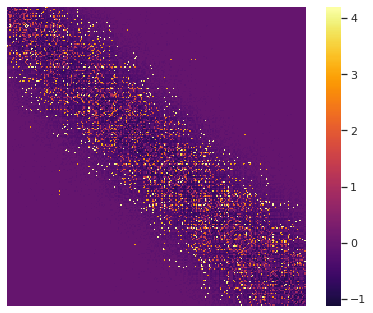

In [82]:
cmap='inferno'
f, ax = plt.subplots(figsize=(7,5.5))
sns.heatmap(z_mat,
            vmax=4.2,
            cmap=cmap,
            xticklabels=[], yticklabels=[],
#             vmin=0,
            square=True,
            center=1.25,
           )
script_n = 'mf_bouton_convergence_210519'
f.savefig(f'{script_n}_zscore_inf_7.png', bbox_inches='tight', transparent=True)

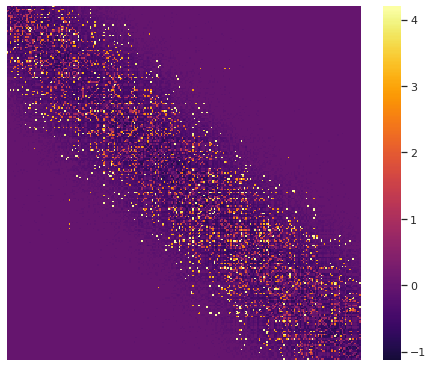

In [83]:
cmap='inferno'
f, ax = plt.subplots(figsize=(8,6.5))
sns.heatmap(z_mat,
            vmax=4.2,
            cmap=cmap,
            xticklabels=[], yticklabels=[],
#             vmin=0,
            square=True,
            center=1.25,
           )
script_n = 'mf_bouton_convergence_210519'
f.savefig(f'{script_n}_zscore_inf_8.png', bbox_inches='tight', transparent=True)

In [107]:
# random_datas = compress_pickle.load('mf_bouton_convergence_210519_random_gen_circle_22000_14800_34800_100.gz')
random_datas = compress_pickle.load('mf_bouton_convergence_210519_random_gen_dist_14800_34800_100.gz')
# calculate means and std
random_data_list = defaultdict(list)
for rand_data in random_datas:
    for pair in itertools.combinations(mf_locs_list, 2):
        pair = tuple(sorted(pair))
        random_data_list[pair].append(rand_data[pair])

import statistics
random_means_mat = []
random_std_mat = []
# z_mat = []
for i in mf_locs_list:
    mean_row = []
    std_row = []
    row = []
    for j in mf_locs_list:
        if i == j:
            mean_row.append(0)
            std_row.append(0)
            row.append(0)
            continue
        l = random_data_list[tuple(sorted((i, j)))]
        mean, std = statistics.mean(l), statistics.stdev(l)
        mean_row.append(mean)
        std_row.append(std)
        if mean == 0 and d == 0:
            row.append(0)
            continue
        elif mean == 0 and std == 0:
            std = 0.01
            val = min((d-mean)/std, 3)
            row.append(val)
            continue
        row.append((d-mean)/std)
    random_means_mat.append(mean_row)
    random_std_mat.append(std_row)
#     z_mat.append(row)